# Análise simples dos Tweets Coletados

In [18]:
import nltk
nltk.download('stopwords')


import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/franciscofoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
caminho = '/home/franciscofoz/Documents/GitHub/python-training/12 - Pacotes Python/tweepy/tweets_csv/tweets_biblioteconomiainteligênciaartificial_20230527.csv'

tweets_biblioteconomia = pd.read_csv(caminho)
tweets_biblioteconomia

,username,username_name,date_brasilia,hora_brasilia,tweet_id,tweet_text,date_GMT,hora_GMT
0,@miguelgonzalo,Miguel Ángel Gonzalo,2023-05-27,07:06:07,1662399775474434048,#Agenda XIX Seminario Hispano Mexicano de Inve...,2023-05-27,10:06:07
1,@BoasPraticasBCI,Observatório de Boas Práticas BCI,2023-05-26,20:09:05,1662234431086551041,A inteligência artificial contribuindo com a d...,2023-05-26,23:09:05
2,@brunorodrigues,Bruno Rodrigues,2023-05-23,21:11:00,1661162848238665730,"RT @FozFrancisco: ""Os profissionais de bibliot...",2023-05-24,00:11:00
3,@FozFrancisco,Francisco Foz,2023-05-23,20:31:44,1661152964558598144,"""A biblioteconomia na inteligência artificial ...",2023-05-23,23:31:44
4,@FozFrancisco,Francisco Foz,2023-05-23,20:31:43,1661152962495016961,"""A aplicação dos princípios da biblioteconomia...",2023-05-23,23:31:43
5,@FozFrancisco,Francisco Foz,2023-05-23,20:31:43,1661152960540479489,"""Os profissionais de biblioteconomia desempenh...",2023-05-23,23:31:43


In [31]:
tweets_biblioteconomia.username.value_counts().head(10)

username
@FozFrancisco       3
@miguelgonzalo      1
@BoasPraticasBCI    1
@brunorodrigues     1
Name: count, dtype: int64

In [32]:
tweets_biblioteconomia.date_brasilia.value_counts()

date_brasilia
2023-05-23    4
2023-05-27    1
2023-05-26    1
Name: count, dtype: int64

In [33]:
tweets_biblioteconomia.tweet_text = tweets_biblioteconomia.tweet_text.str.lower()

In [34]:
palavras_tweets = []
for tweet in tweets_biblioteconomia['tweet_text']:
    palavras_tweets.extend(tweet.split())
        

In [35]:
palavras_tweets

['#agenda',
 'xix',
 'seminario',
 'hispano',
 'mexicano',
 'de',
 'investigación',
 'en',
 'biblioteconomía',
 'y',
 'documentación:',
 '“información',
 'y',
 'datos',
 'en',
 'tiempos',
 'de',
 'postpandemia.',
 'investigación,',
 'docencia',
 'y',
 'práctica',
 'profesional”,',
 'participo',
 'en',
 'una',
 'mesa',
 'sobre',
 'inteligencia',
 'artificial',
 'y',
 'datos.',
 'https://t.co/7nh9cdv6zi',
 'https://t.co/uvjfk6gbdq',
 'a',
 'inteligência',
 'artificial',
 'contribuindo',
 'com',
 'a',
 'democratização',
 'da',
 'leitura!',
 '📚✨',
 'visite',
 'nosso',
 'site',
 'para',
 'saber',
 'mais:',
 '🔗https://t.co/odmqbmeiqf',
 '#boaspraticasbci',
 '#biblioteconomia',
 '#projetodeextensaoufrn',
 '#librarianship',
 'https://t.co/px4zknv7pk',
 'rt',
 '@fozfrancisco:',
 '"os',
 'profissionais',
 'de',
 'biblioteconomia',
 'desempenham',
 'um',
 'papel',
 'crucial',
 'na',
 'criação',
 'de',
 'metadados',
 'para',
 'os',
 'conjuntos',
 'de',
 'dados',
 'util…',
 '"a',
 'biblioteconomia'

In [36]:
stop_words = stopwords.words('portuguese')
termos_excluidos = ['-','la','el','tipo','biblioteconomia','na','pra','en','na', 'y']

stop_words.extend(termos_excluidos)


In [37]:
palavras_tweets_sem_stopwords = []

for palavra in palavras_tweets:
    if palavra not in stop_words:
        palavras_tweets_sem_stopwords.append(palavra)

In [38]:
frequencia_palavras = FreqDist(palavras_tweets_sem_stopwords)
sorted(dict(frequencia_palavras).items(), key=lambda x: x[1], reverse=True)

    


[('y', 4),
 ('artificial', 4),
 ('inteligência', 4),
 ('conjuntos', 3),
 ('dados', 3),
 ('"os', 2),
 ('profissionais', 2),
 ('desempenham', 2),
 ('papel', 2),
 ('crucial', 2),
 ('criação', 2),
 ('metadados', 2),
 ('"a', 2),
 ('#agenda', 1),
 ('xix', 1),
 ('seminario', 1),
 ('hispano', 1),
 ('mexicano', 1),
 ('investigación', 1),
 ('biblioteconomía', 1),
 ('documentación:', 1),
 ('“información', 1),
 ('datos', 1),
 ('tiempos', 1),
 ('postpandemia.', 1),
 ('investigación,', 1),
 ('docencia', 1),
 ('práctica', 1),
 ('profesional”,', 1),
 ('participo', 1),
 ('una', 1),
 ('mesa', 1),
 ('sobre', 1),
 ('inteligencia', 1),
 ('datos.', 1),
 ('https://t.co/7nh9cdv6zi', 1),
 ('https://t.co/uvjfk6gbdq', 1),
 ('contribuindo', 1),
 ('democratização', 1),
 ('leitura!', 1),
 ('📚✨', 1),
 ('visite', 1),
 ('site', 1),
 ('saber', 1),
 ('mais:', 1),
 ('🔗https://t.co/odmqbmeiqf', 1),
 ('#boaspraticasbci', 1),
 ('#biblioteconomia', 1),
 ('#projetodeextensaoufrn', 1),
 ('#librarianship', 1),
 ('https://t.co/p

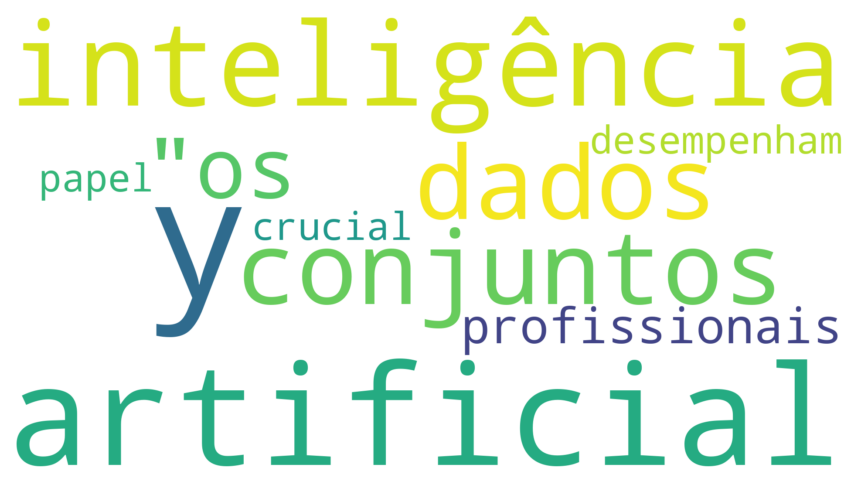

In [39]:
# Criar a nuvem de palavras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="white",
                      width=1920,
                      height=1080,
                      max_words=10,
                      prefer_horizontal=1).generate_from_frequencies(frequencia_palavras)
frequencia_palavras

# Plotar a nuvem de palavras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
